<a href="https://colab.research.google.com/github/ShenChikai/Aritificial-Intelligence/blob/main/Chikai_Shen_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game Theory





In this homework, you will implement two players that employ the *Best Response with Inertia* algorithm against each other.

Here is an outline of the algorithm:

* On day one, play a random action. 

* On day $t$, do one of two things:

   *   Either, with high probability, play the best response to what your opponent did yesterday, or
   *   With low probability, be lazy and just do what you did yesterday.

The particular 2x2 game being played is the Stag-Hunt game, with the matrix:

|  | | |
|---|---|---|
|  | S | H |
| S | 3, 3 | 0, 2 |
| H | 2, 0 | 2, 2 |

Player 1 (P1) is the $row$ player; Player 2 (P2) is the $col$ player.

Complete the assignment by addressing TODOs called out below.

In [ ]:
# Parameters
K = 100 # Number of trials
N = 1000 # Number of days

In [ ]:
# The actions available to each player
actions_p1 = ['S', 'H']
actions_p2 = ['S', 'H']

# Store history of actions
action_p1_history = []
action_p2_history = []

# Store history of utilities
utility_p1_history = []
utility_p2_history = []

In [ ]:
# Utilities for players are defined over joint actions
# The payoffs can be distributed using a singe function, where the first value of the returned tuple is the utility of Player 1 and the second value goes to Player 2. 
# For other games, this may not be the case, and you might need to write separate utility functions for each player.
def get_utility(a):
    if a[0] == 'S' and a[1] == 'S':
       return (3, 3)
    elif a[0] == 'S' and a[1] == 'H':
       return (0, 2)
    elif a[0] == 'H' and a[1] == 'S':
       return (2, 0)
    elif a[0] == 'H' and a[1] == 'H':
      return (2, 2)

# TODO (1 of 2)


Fix how each agent chooses an action.
The way the code is set up right now, each player simply does "S" everyday, for each trial. We would like the agents to choose actions using the *Best Response with inertia* algorithm, described above.

In [ ]:
# Import library
import numpy as np

# Simulate K trials
for trial in range(K):

    # Play for N days
    for day in range(N):
        # -------------------------- Changed Code ----------------------------
        # Base Case for Day 1 (random actions)
        if day == 0:
          action_p1 = actions_p1[np.random.randint(low = 0, high = 2)]
          action_p2 = actions_p2[np.random.randint(low = 0, high = 2)]
          
        # Day > 1 (best response with inertia)
        else:
          # Define high prob = 90%
          # Threshold as 90 from a randomly generated number between 1 to 100
          # For p1
          prob1 = np.random.randint(low = 1, high = 101)
          if (prob1 <= 90):
            # BR: Best response to what others did yesterday
            # if p2 == 'S' yesterday, p1 = 'S'; if p2 == 'H' yesterday, p1 = 'H'
            if action_p2_history[trial*1000 + day - 1] == 'S':
              action_p1 = 'S'
            else:
              action_p1 = 'H'
          else:
            # Inertia: do what the player did yesterday
            action_p1 = action_p1_history[trial*1000 + day - 1]

          # For p2
          prob2 = np.random.randint(low = 1, high = 101)
          if (prob2 <= 90):
            # if p1 == 'S' yesterday, p2 = 'S'; if p1 == 'H' yesterday, p2 = 'H'
            if action_p1_history[trial*1000 + day - 1] == 'S':
              action_p2 = 'S'
            else:
              action_p2 = 'H'
          else:
            action_p2 = action_p2_history[trial*1000 + day - 1]
        # -------------------------- Changed Code ----------------------------
       
        # Store the day's actions
        action_p1_history.append(action_p1)
        action_p2_history.append(action_p2)
        
        # Distribute utilities
        utility_p1, utility_p2 = get_utility([action_p1, action_p2])

        # Store the day's utilities
        utility_p1_history.append(utility_p1)
        utility_p2_history.append(utility_p2)

        # Feel free to uncomment for debugging
        #print("Day: ", day)
        #print("Player 1's action history: ", action_p1_history)
        #print("Player 2's action history: ", action_p2_history)
        #print("Player 1's utility history: ", utility_p1_history)
        #print("Player 2's utility history: ", utility_p2_history)
        #print("*************")
    #     if day < 10 and trial < 3:
    #       if day == 0:
    #         print('trial',trial,'day',day,'action',action_p1,action_p2, len(action_p1_history))
    #       else:
    #         print('trial',trial,'day',day,'action',action_p1,action_p2,'prob',prob1,prob2,'yesterday at',trial*1000 + day - 1,':',action_p1_history[trial*1000 + day - 1],action_p2_history[trial*1000 + day - 1] )
    # if trial < 3: print("############################################################")

# TODO (2 of 2)

Comment on this sytem by showing which action pair $(a_{i},a_{-i})$ is utilized the most. Use a histogram, a heat map, or any other appropriate plot. The resulting visualization will help indicate which cell in our original Stag-Hunt matrix the agents tend to spend most of their time.

Frequencies: [999, 0, 0, 0]


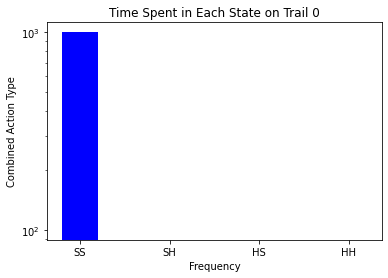

Frequencies: [997, 1, 1, 0]


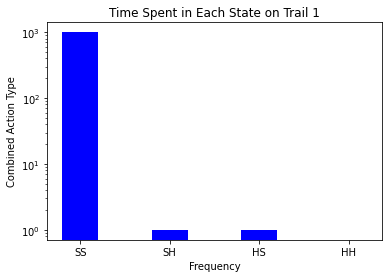

Frequencies: [998, 0, 1, 0]


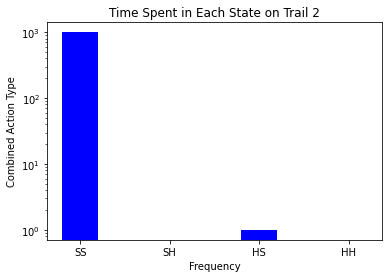

Frequencies: [999, 0, 0, 0]


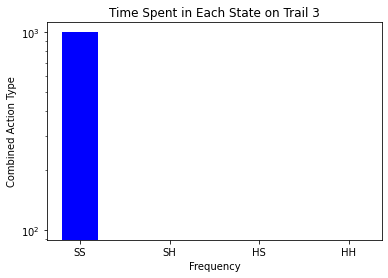

Frequencies: [0, 0, 0, 999]


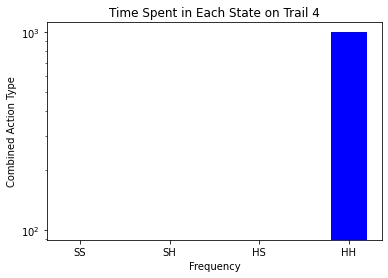

Frequencies: [0, 0, 0, 999]


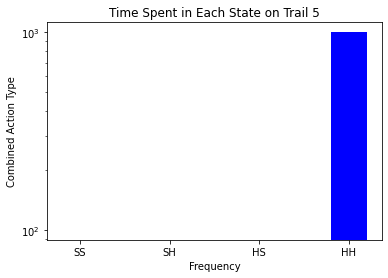

Frequencies: [0, 4, 5, 990]


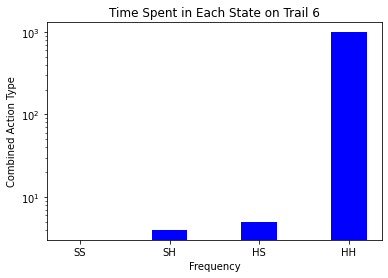

Frequencies: [0, 1, 0, 998]


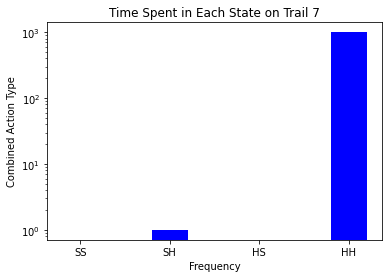

Frequencies: [999, 0, 0, 0]


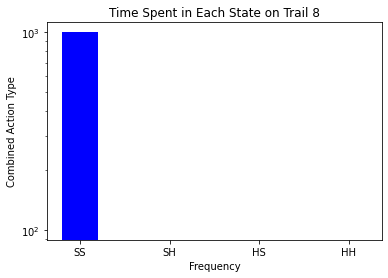

Frequencies: [0, 1, 3, 995]


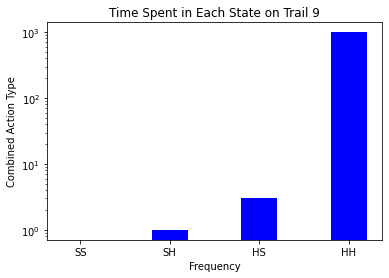

Frequencies: [0, 1, 1, 997]


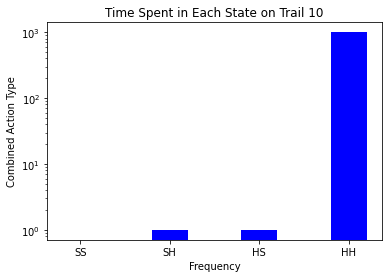

Frequencies: [0, 0, 0, 999]


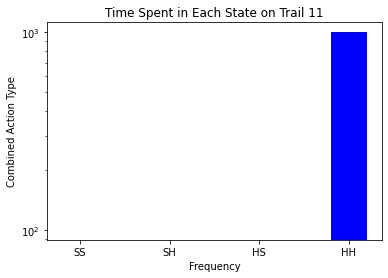

Frequencies: [999, 0, 0, 0]


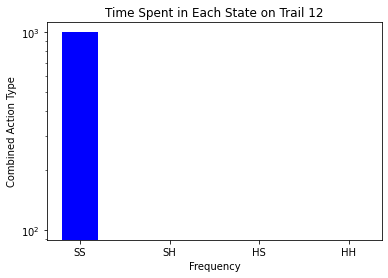

Frequencies: [0, 1, 0, 998]


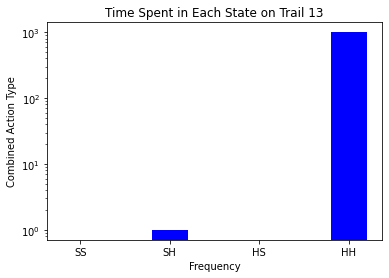

Frequencies: [0, 0, 0, 999]


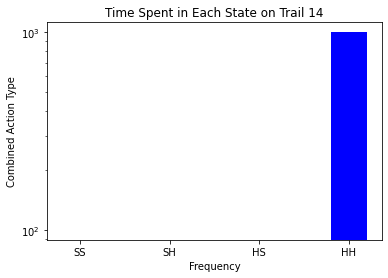

Frequencies: [999, 0, 0, 0]


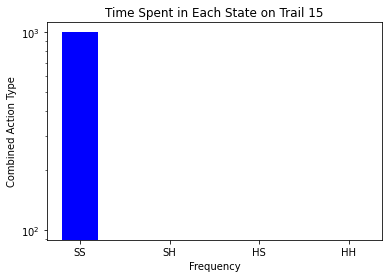

Frequencies: [0, 10, 10, 979]


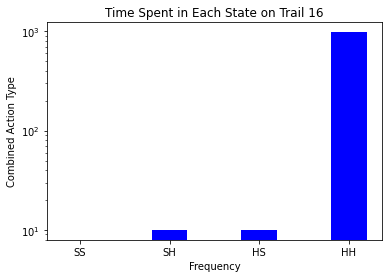

Frequencies: [998, 0, 1, 0]


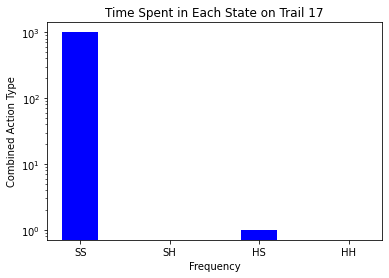

Frequencies: [0, 3, 4, 992]


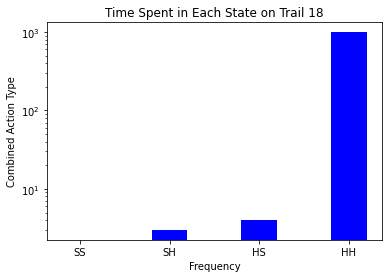

Frequencies: [999, 0, 0, 0]


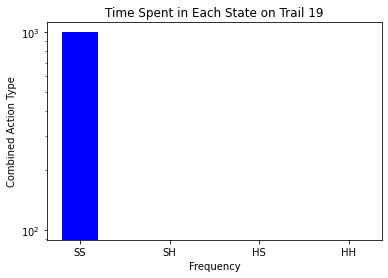

Frequencies: [0, 0, 0, 999]


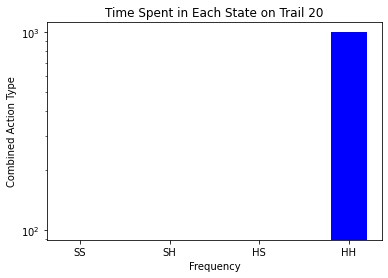

Frequencies: [985, 7, 7, 0]


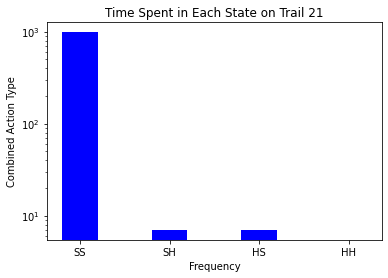

Frequencies: [0, 0, 0, 999]


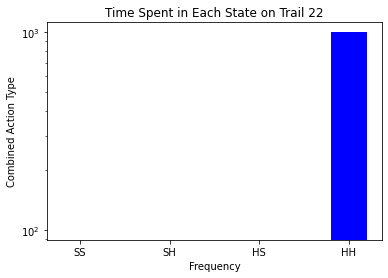

Frequencies: [0, 0, 0, 999]


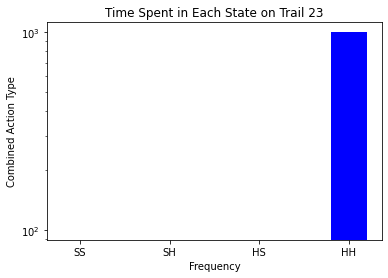

Frequencies: [0, 3, 3, 993]


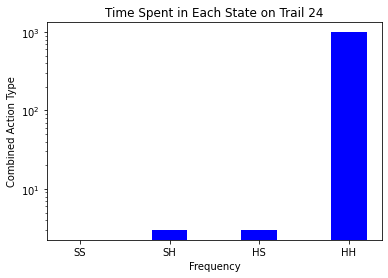

Frequencies: [996, 2, 1, 0]


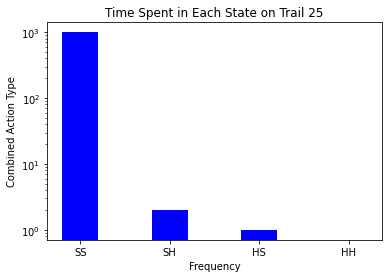

Frequencies: [999, 0, 0, 0]


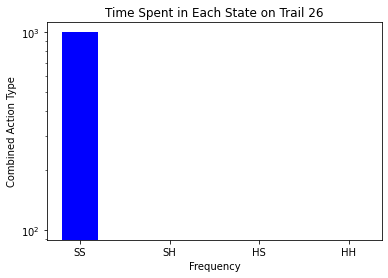

Frequencies: [0, 5, 6, 988]


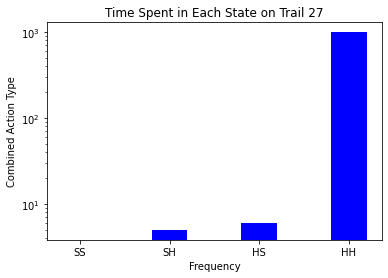

Frequencies: [998, 0, 1, 0]


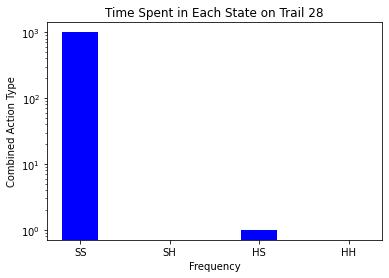

Frequencies: [0, 1, 1, 997]


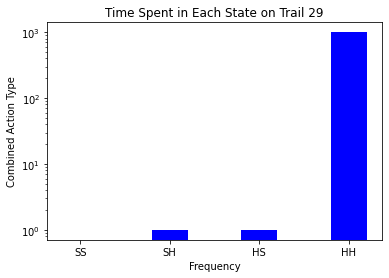

Frequencies: [999, 0, 0, 0]


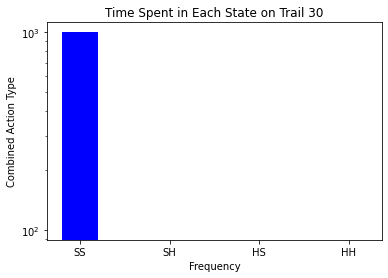

Frequencies: [999, 0, 0, 0]


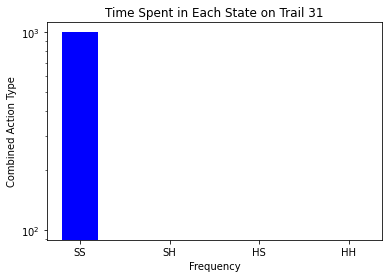

Frequencies: [997, 1, 1, 0]


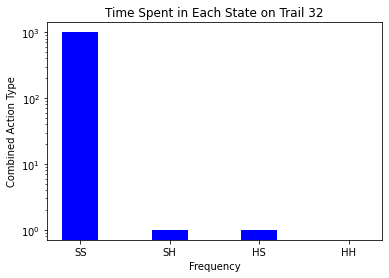

Frequencies: [0, 0, 0, 999]


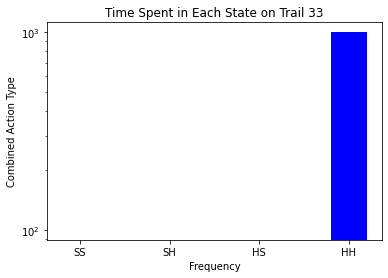

Frequencies: [0, 0, 1, 998]


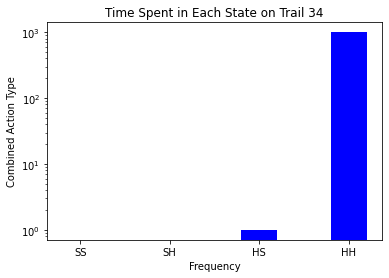

Frequencies: [0, 4, 5, 990]


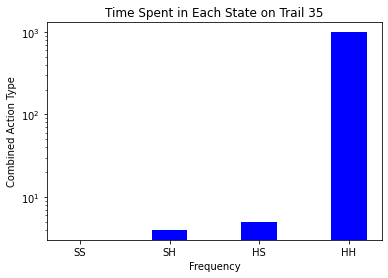

Frequencies: [0, 0, 0, 999]


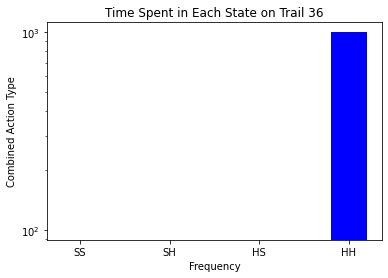

Frequencies: [0, 0, 0, 999]


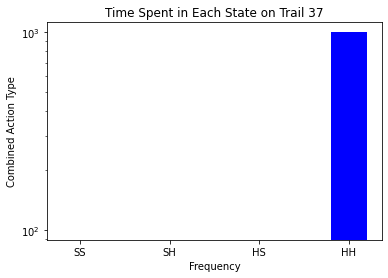

Frequencies: [0, 1, 1, 997]


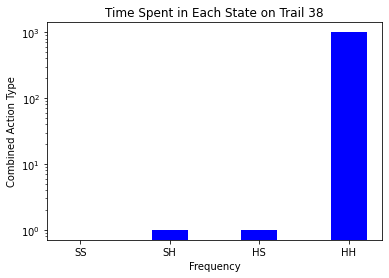

Frequencies: [0, 0, 0, 999]


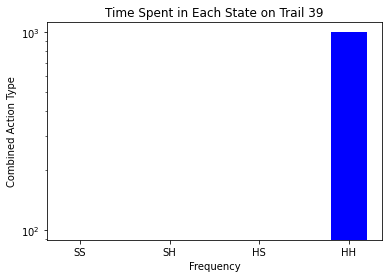

Frequencies: [994, 2, 3, 0]


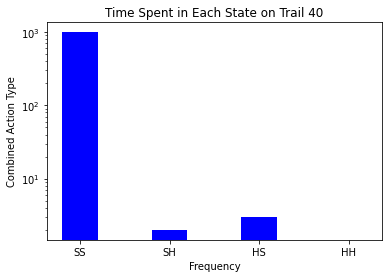

Frequencies: [993, 3, 3, 0]


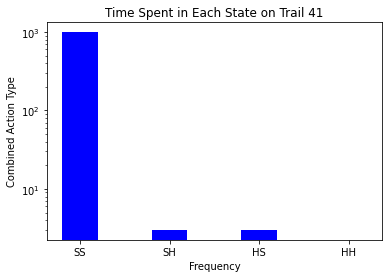

Frequencies: [0, 4, 4, 991]


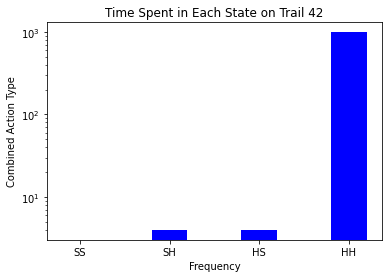

Frequencies: [995, 2, 2, 0]


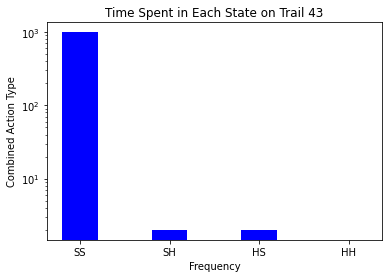

Frequencies: [998, 1, 0, 0]


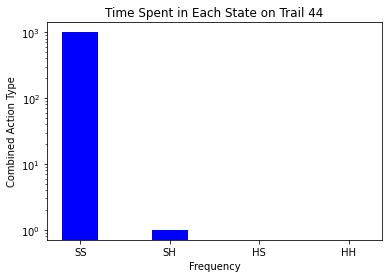

Frequencies: [987, 6, 6, 0]


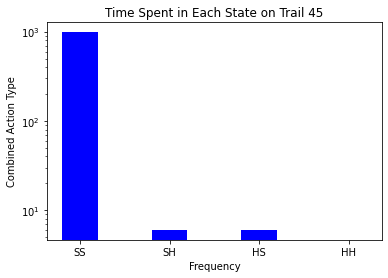

Frequencies: [0, 0, 0, 999]


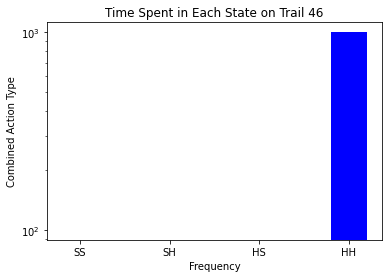

Frequencies: [0, 0, 0, 999]


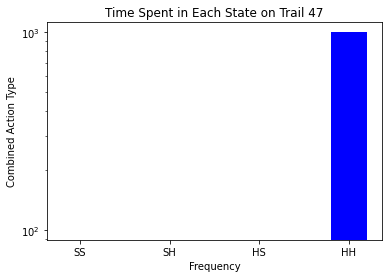

Frequencies: [0, 0, 0, 999]


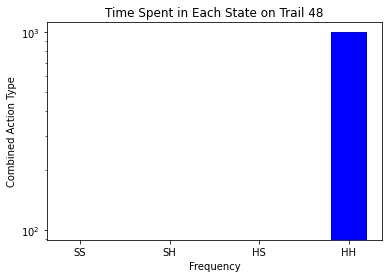

Frequencies: [0, 0, 0, 999]


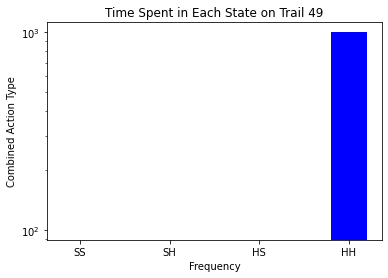

Frequencies: [0, 0, 0, 999]


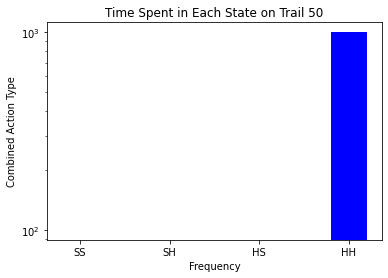

Frequencies: [990, 4, 5, 0]


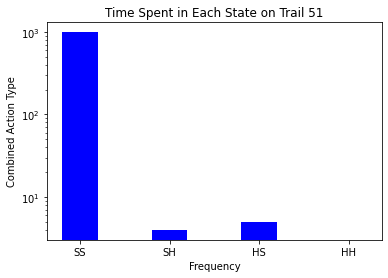

Frequencies: [0, 2, 2, 995]


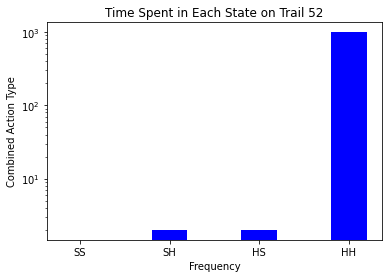

Frequencies: [999, 0, 0, 0]


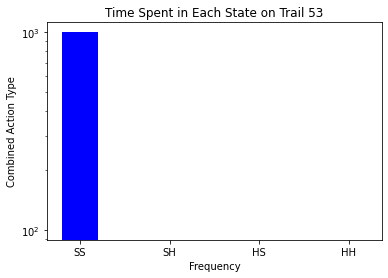

Frequencies: [0, 0, 1, 998]


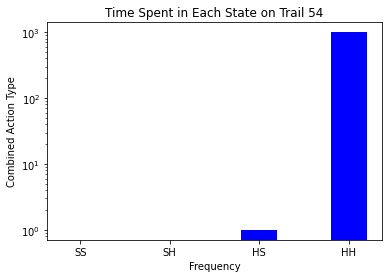

Frequencies: [999, 0, 0, 0]


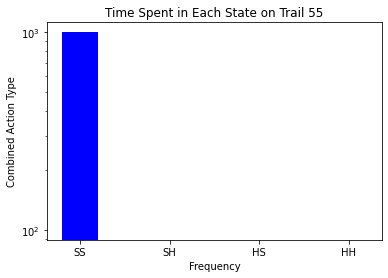

Frequencies: [999, 0, 0, 0]


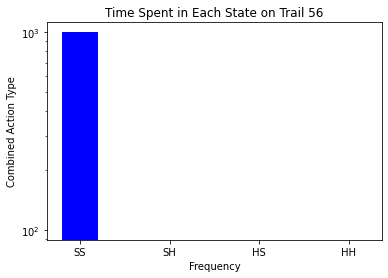

Frequencies: [999, 0, 0, 0]


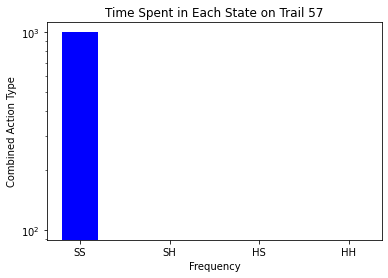

Frequencies: [999, 0, 0, 0]


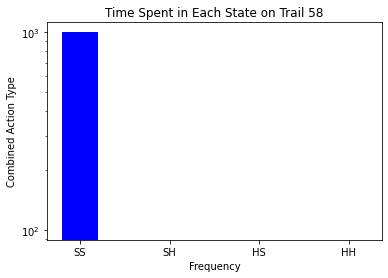

Frequencies: [999, 0, 0, 0]


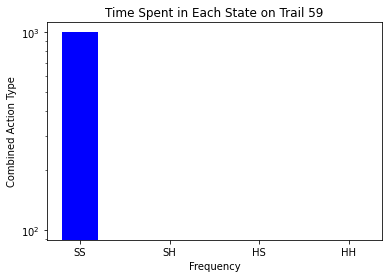

Frequencies: [0, 0, 0, 999]


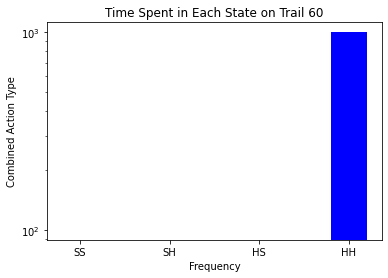

Frequencies: [0, 0, 0, 999]


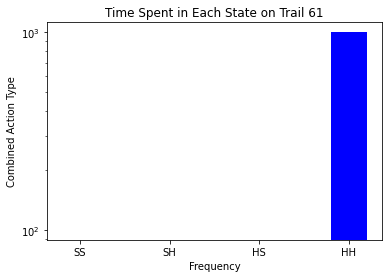

Frequencies: [999, 0, 0, 0]


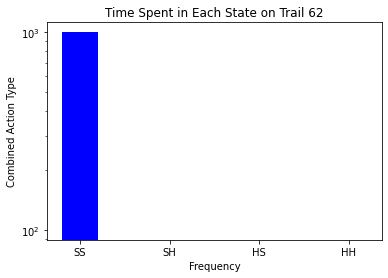

Frequencies: [0, 2, 2, 995]


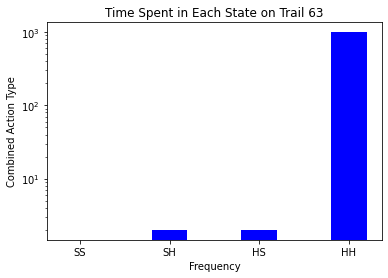

Frequencies: [997, 1, 1, 0]


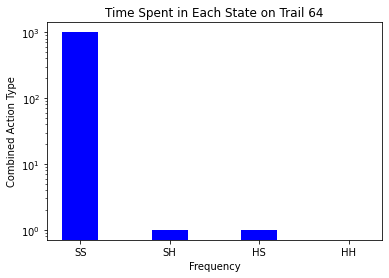

Frequencies: [0, 2, 3, 994]


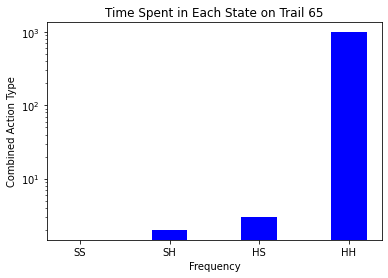

Frequencies: [990, 4, 5, 0]


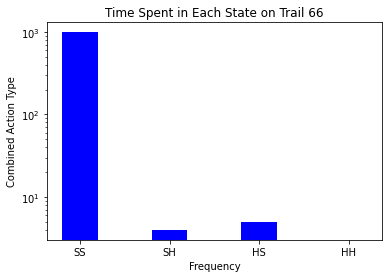

Frequencies: [987, 6, 6, 0]


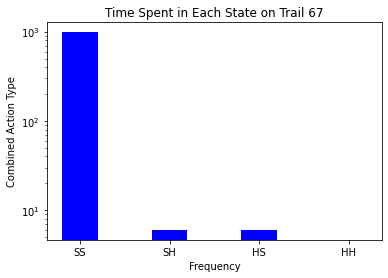

Frequencies: [0, 0, 0, 999]


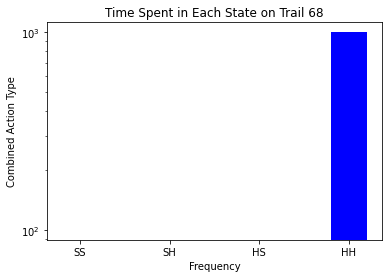

Frequencies: [0, 0, 0, 999]


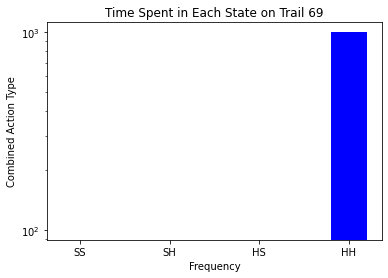

Frequencies: [999, 0, 0, 0]


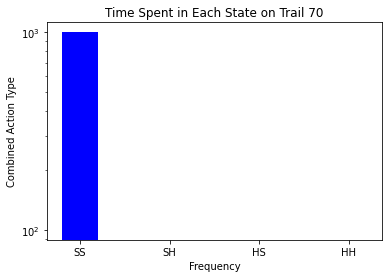

Frequencies: [0, 1, 1, 997]


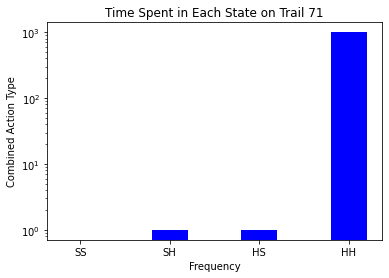

Frequencies: [0, 1, 2, 996]


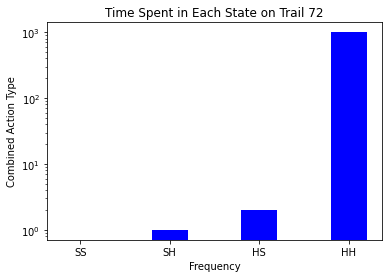

Frequencies: [999, 0, 0, 0]


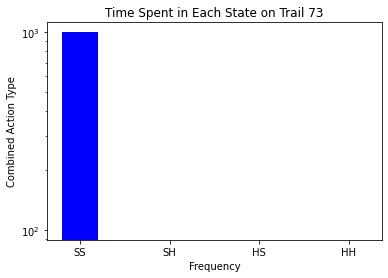

Frequencies: [0, 0, 0, 999]


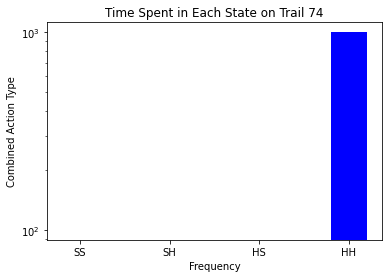

Frequencies: [0, 3, 2, 994]


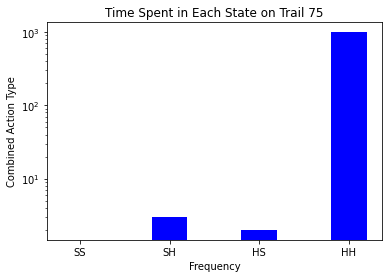

Frequencies: [0, 0, 0, 999]


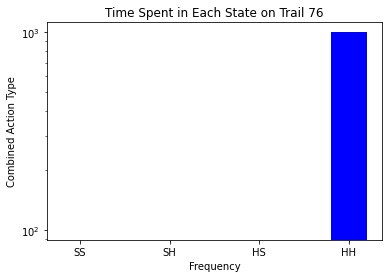

Frequencies: [999, 0, 0, 0]


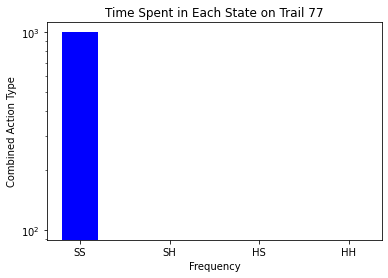

Frequencies: [0, 1, 1, 997]


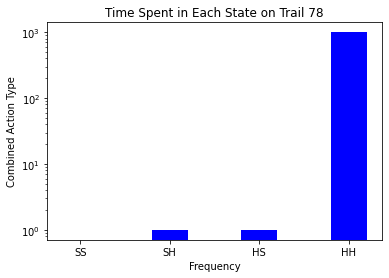

Frequencies: [999, 0, 0, 0]


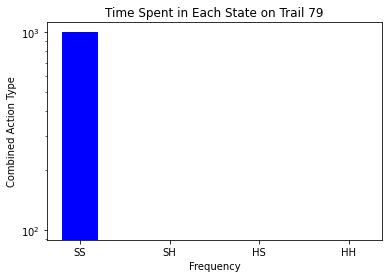

Frequencies: [0, 4, 5, 990]


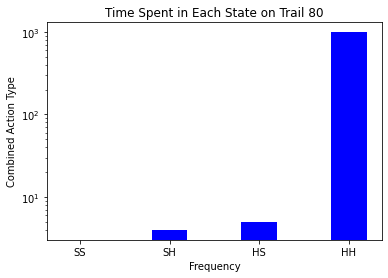

Frequencies: [0, 1, 2, 996]


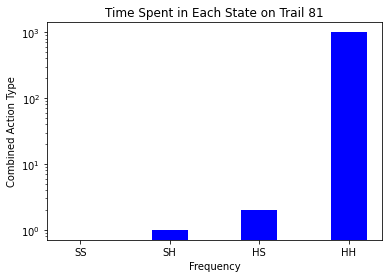

Frequencies: [989, 5, 5, 0]


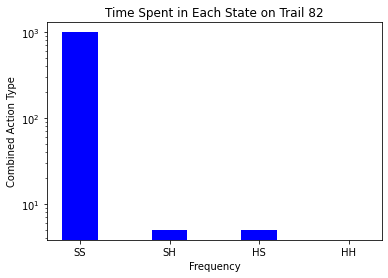

Frequencies: [0, 0, 0, 999]


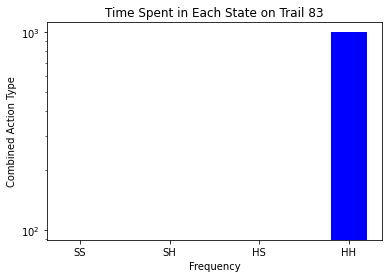

Frequencies: [0, 0, 0, 999]


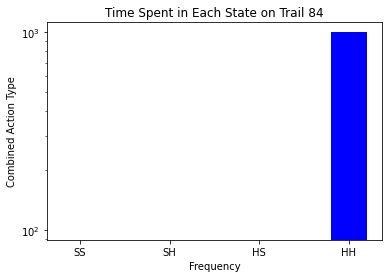

Frequencies: [0, 0, 0, 999]


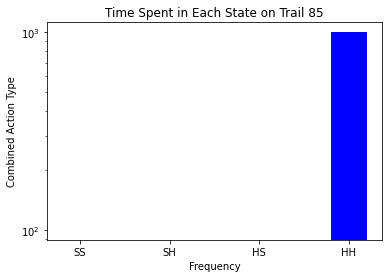

Frequencies: [999, 0, 0, 0]


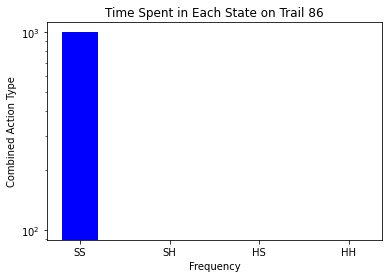

Frequencies: [997, 1, 1, 0]


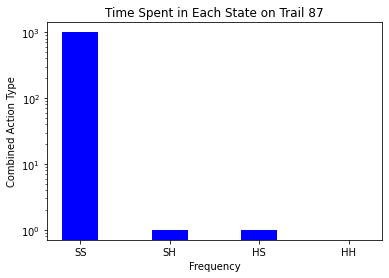

Frequencies: [999, 0, 0, 0]


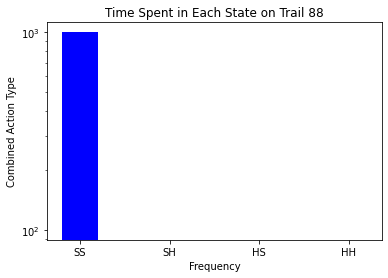

Frequencies: [0, 7, 6, 986]


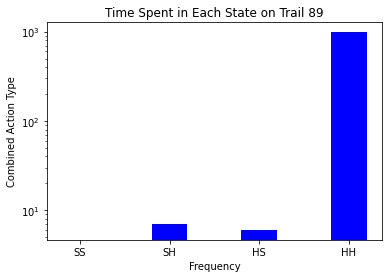

Frequencies: [0, 0, 0, 999]


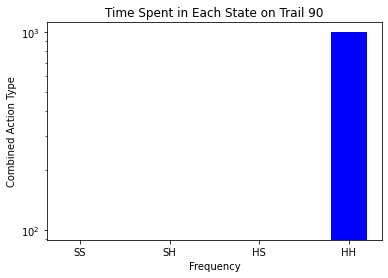

Frequencies: [996, 2, 1, 0]


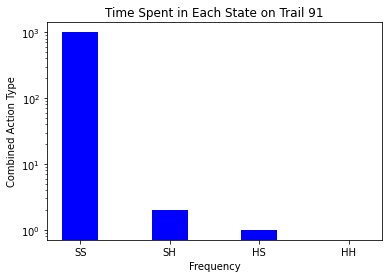

Frequencies: [0, 0, 0, 999]


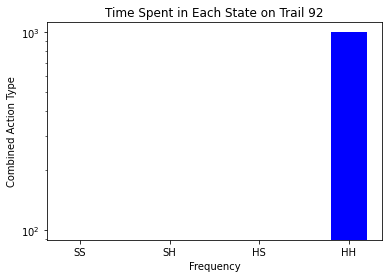

Frequencies: [0, 2, 1, 996]


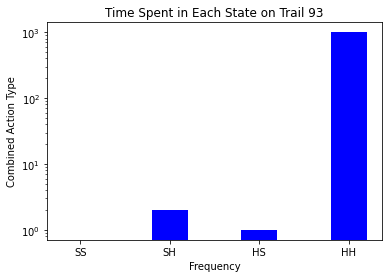

Frequencies: [0, 3, 2, 994]


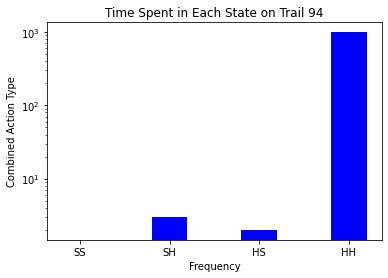

Frequencies: [992, 3, 4, 0]


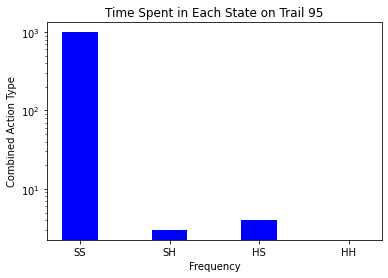

Frequencies: [999, 0, 0, 0]


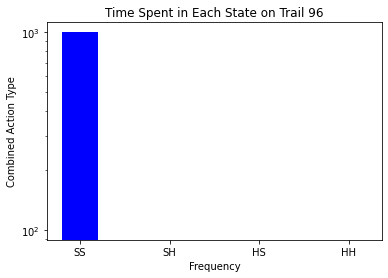

Frequencies: [997, 1, 1, 0]


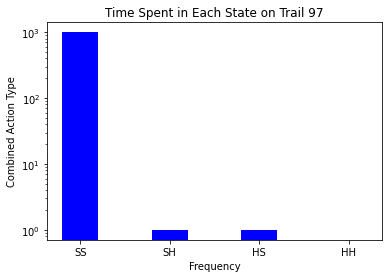

Frequencies: [998, 0, 1, 0]


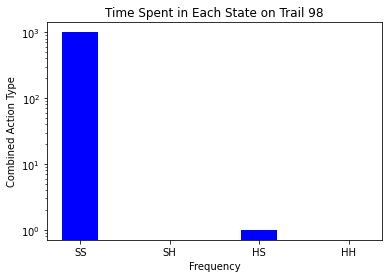

Frequencies: [0, 0, 1, 998]


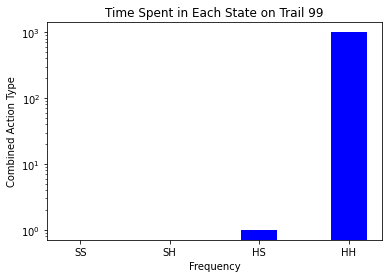

In [ ]:
# Visualization
# Plot the histogram or heat map of joint actions played over the course of the K N-day trials.
# Import library
import matplotlib.pyplot as plt
# Calcuate the frequencies of each type for each trial
for t in range(K):
  # Define the 4 combined action types
  SS, SH, HS, HH = 0, 0, 0, 0
  for p1_act, p2_act in zip(action_p1_history[t*1000:(t+1)*1000-1], action_p2_history[t*1000:(t+1)*1000-1]):
    if p1_act == 'S' and p2_act == 'S':
      SS += 1
    if p1_act == 'S' and p2_act == 'H':
      SH += 1
    if p1_act == 'H' and p2_act == 'S':
      HS += 1
    if p1_act == 'H' and p2_act == 'H':
      HH += 1
  Freq = [SS, SH, HS, HH]
  # Plot histogram
  print('Frequencies:', Freq)
  plt.figure()
  plt.bar(['SS', 'SH', 'HS', 'HH'], Freq, color ='b', width = 0.4)
  plt.yscale('log')
  plt.xlabel("Frequency")
  plt.ylabel("Combined Action Type")
  plt.title(f"Time Spent in Each State on Trail {t}")
  plt.show()

Briefly comment on the resulting visulation below

The plots are drawn in logarithmic scale to see the smaller frequencies in states. It is known that there are two nash equilibria in stag-hunt games which are demonstrated in the plots (HH, SS). The threshold probability of the best response is set to 95% to see a good amount of best response actions given the response of the other hunter yesterday. After reaching a nash equilibrium, either best reponse or inertia will not affect the equilibrium. Depends on what state the 2 players start in the first day, there are 2 type of cases:



> Case 1: Start out with HH or SS
* This is already in the nash equilibrium.


> Case 2: Start out with SH or HS
* Switching between SH and HS state with high probablity of best response. Once only one of the players keeps his/her original state so that the next state becomes SS or HH, which is then an equilibirum like case 1.

